In [344]:
from pathlib import Path
from os import path
import pandas as pd
import seaborn as sns
from util import fig_to_pgf_buffer

DATA_ROOT = '.'

plot_outputs = path.join(DATA_ROOT, 'plot_outputs')
Path(plot_outputs).mkdir(parents=True, exist_ok=True)

table_outputs = path.join(DATA_ROOT, 'table_outputs')
Path(table_outputs).mkdir(parents=True, exist_ok=True)

sns.set_style('whitegrid')

In [332]:
import pickle
from datasets.loader import load_dataset
from cp_runner import CPRunner
import os

directory = '/Users/lucakillmaier/Documents/Studium/BA/results/final'

results: dict[str, CPRunner] = {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        filepath = os.path.join(directory, filename)
        key = os.path.splitext(filename)[0]
        try:
            with open(filepath, 'rb') as f:
                save_data = pickle.load(f)
                dataset = load_dataset(save_data['dataset_name'], 0.1, DATA_ROOT)  # hold_out_size doesn't matter here

                results[key] = CPRunner.from_save(save_data, dataset)
        except Exception as e:
            print(f"Error loading {filename}: {e}")



Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified


In [333]:
from metrics import get_results_metrics

_, y_test_adience = results['adience0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()
_, y_test_fgnet = results['fgnet0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()
_, y_test_rmnist = results['retinamnist0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()

results_adience_std = results['adience0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_adience_uni = results['adience0.15_resnet18uni_lacaps_ce_5reps'].get_results()
results_fgnet_std_wowk = results['fgnet0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_fgnet_uni = results['fgnet0.15_resnet18uni_lacaps_ce_5reps'].get_results()
results_fgnet_wk = results['fgnet0.15_resnet18_lacapsrps_wk_5reps'].get_results()
results_rmnist_std_wowk = results['retinamnist0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_rmnist_uni = results['retinamnist0.15_resnet18uni_lacaps_ce_5reps'].get_results()
results_rmnist_wk = results['retinamnist0.15_resnet18_lacapsrps_wk_5reps'].get_results()

results_fgnet_std = dict(results_fgnet_std_wowk)
results_fgnet_std.update(results_fgnet_wk)
results_rmnist_std = dict(results_rmnist_std_wowk)
results_rmnist_std.update(results_rmnist_wk)

df_adience_std = get_results_metrics(results_adience_std, y_test_adience, 'collect')
df_adience_uni = get_results_metrics(results_adience_uni, y_test_adience, 'collect')
df_fgnet_std = get_results_metrics(results_fgnet_std, y_test_fgnet, 'collect')
df_fgnet_uni = get_results_metrics(results_fgnet_uni, y_test_fgnet, 'collect')
df_rmnist_std = get_results_metrics(results_rmnist_std, y_test_rmnist, 'collect')
df_rmnist_uni = get_results_metrics(results_rmnist_uni, y_test_rmnist, 'collect')


/Users/lucakillmaier/miniconda3/envs/conformal-prediction/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lucakillmaier/miniconda3/envs/conformal-prediction/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/lucakillmaier/miniconda3/envs/conformal-prediction/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lucakillmaier/miniconda3/envs/conformal-prediction/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/lucakillmaier/miniconda3/envs/conformal-prediction/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtyp

In [362]:
import pandas as pd

def df_cond_ce_aps(df):
    return df[(df['loss_fn'] == 'CrossEntropy') & (df['score_alg'] == 'APS')]

def df_cond_std_ce_aps_rps_or_uni_ce_all(df):
    return df[(df['loss_fn'] == 'CrossEntropy') & ((df['score_alg'] == 'APS') | (df['score_alg'] == 'RPS') | (df['model'] == 'resnet18-uni'))]

def df_cond_ce_lac_aps_rps(df):
    return df[(df['loss_fn'] == 'CrossEntropy') & ((df['score_alg'] == 'LAC') | (df['score_alg'] == 'APS') | (df['score_alg'] == 'RPS'))]

def df_cond_ce_tce_wk_emd_aps(df):
    return df[((df['loss_fn'] == 'CrossEntropy') | (df['loss_fn'] == 'TriangularCrossEntropy') | (df['loss_fn'] == 'EMD')) & (df['score_alg'] == 'APS')]

def df_cond_ce_or_tcestd_aps_rps(df):
    return df[((df['loss_fn'] == 'CrossEntropy') | (((df['loss_fn'] == 'TriangularCrossEntropy') | (df['loss_fn'] == 'EMD')) & (df['model'] == 'resnet18'))) & ((df['score_alg'] == 'APS') | (df['score_alg'] == 'RPS'))]

def label_method(df):
    df['method'] = df['model'] + '_' + df['loss_fn'] + '_' + df['score_alg']
    return df

def label_dataset(df, dataset):
    df['dataset'] = dataset
    return df

In [351]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def paper_plot_accuracy(data, x_key="method"):
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.boxplot(data=df, x=x_key, y="accuracy", ax=ax)
        ax.set_title(label)

    plt.tight_layout()
    plt.show()
    return fig

def paper_plot_mae(data, x_key="method"):
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.boxplot(data=df, x=x_key, y="mae", ax=ax, color='red')
        ax.set_title(label)

    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_non_contiguous_perc(data, x_key="method"):
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.boxplot(data=df, x=x_key, y="non_contiguous_percentage", ax=ax, color='yellow')
        ax.set_title(label)

    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_coverage(data, legend_seperate=False):
    if len(data) == 1 and legend_seperate:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.lineplot(data=df, x="alpha", y="coverage", hue="method", ax=ax, errorbar=("ci", 95))
        alphas = np.linspace(df["alpha"].min(), df["alpha"].max(), 100)
        expected = 1 - alphas
        ax.plot(alphas, expected, linestyle="dashed", color="black", linewidth=0.5, zorder=1)
        ax.set_title(label)

    if axes[0].get_legend() is not None:
        handles, labels = axes[0].get_legend_handles_labels()
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    if handles and labels and not legend_seperate:
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.9, 0.25))

    plt.tight_layout()
    plt.show()
    if legend_seperate:
        return fig, handles, labels
    return fig

def paper_plot_ssc_score(data, legend_seperate=False):
    if len(data) == 1 and legend_seperate:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.lineplot(data=df, x="alpha", y="ssc_score", hue="method", ax=ax, errorbar=("ci", 95))
        alphas = np.linspace(df["alpha"].min(), df["alpha"].max(), 100)
        expected = 1 - alphas
        ax.plot(alphas, expected, linestyle="dashed", color="black", linewidth=0.5, zorder=1)
        ax.set_title(label)

    if axes[0].get_legend() is not None:
        handles, labels = axes[0].get_legend_handles_labels()
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    if handles and labels and not legend_seperate:
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.9, 0.25))

    plt.tight_layout()
    plt.show()
    if legend_seperate:
        return fig, handles, labels
    return fig

def paper_plot_mean_width(data, legend_seperate=False):
    if len(data) == 1 and legend_seperate:
        fig, ax = plt.subplots(figsize=(5, 3))
        axes = [ax]
    else:
        num_rows = int(np.ceil(len(data) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 3))
        axes = axes.flatten()
        if len(data) % 2 != 0:
            axes[-1].axis('off')

    for label, df, ax in zip(data.keys(), data.values(), axes):
        sns.lineplot(data=df, x="alpha", y="mean_width", hue="method", ax=ax, errorbar=("ci", 95))
        ax.set_title(label)

    if axes[0].get_legend() is not None:
        handles, labels = axes[0].get_legend_handles_labels()
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    if handles and labels and not legend_seperate:
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.9, 0.25))

    plt.tight_layout()
    plt.show()
    if legend_seperate:
        return fig, handles, labels
    return fig


def paper_plot_overall_coverages(data, ylower=None, yupper=None):
    fig, ax = plt.subplots()
    sns.barplot(data=data, x="method", y="coverage", hue="dataset", ax=ax)
    ax.set_ybound(ylower, yupper)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_overall_ssc_score(data, ylower=None, yupper=None):
    fig, ax = plt.subplots()
    sns.barplot(data=data, x="method", y="ssc_score", hue="dataset", ax=ax)
    ax.set_ybound(ylower, yupper)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_overall_mean_width(data, ylower=None, yupper=None):
    fig, ax = plt.subplots()
    data["mean_width_proportional"] = data["mean_width"] / data["dataset"].map(lambda d: results[f'{d.lower()}0.15_resnet18_allscores_alllosses_5reps'].dataset.get_num_classes())
    sns.barplot(data=data, x="method", y="mean_width_proportional", hue="dataset", ax=ax)
    # plt.gca().invert_yaxis()
    ax.set_ybound(ylower, yupper)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_overall_non_contiguous_perc(data, ylower=None, yupper=None):
    fig, ax = plt.subplots()
    sns.barplot(data=data, x="method", y="non_contiguous_percentage", hue="dataset", ax=ax)
    ax.set_ybound(ylower, yupper)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def paper_plot_legend(handles, labels):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.axis('off')
    fig.legend(handles, labels, loc='center left')
    plt.tight_layout()
    return fig


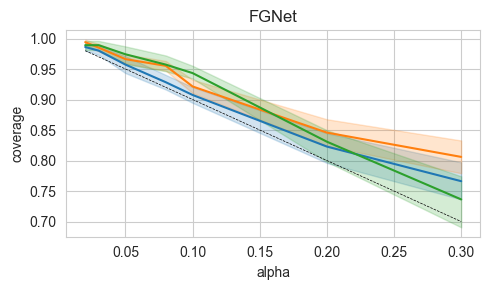

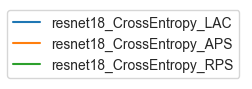

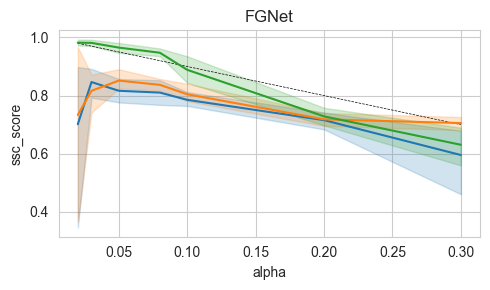

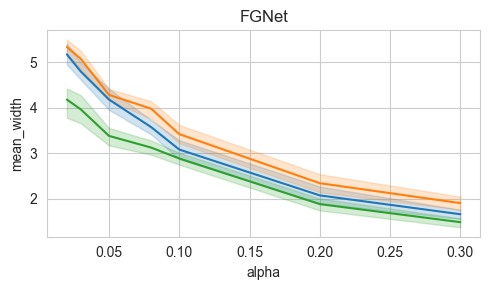

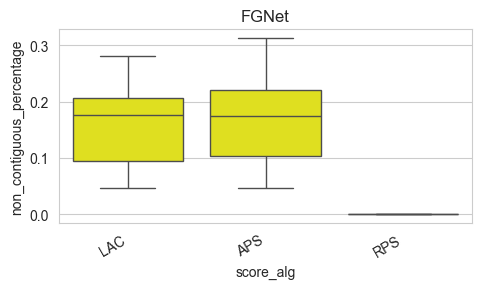

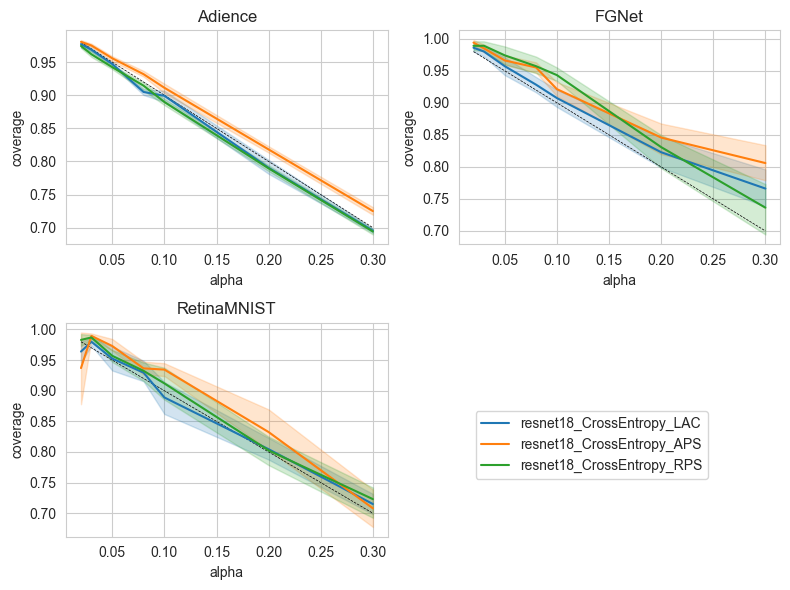

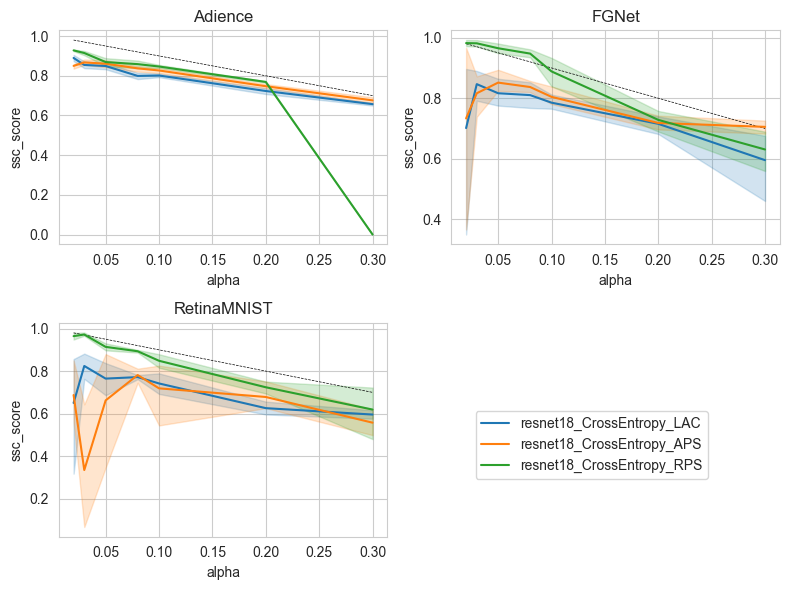

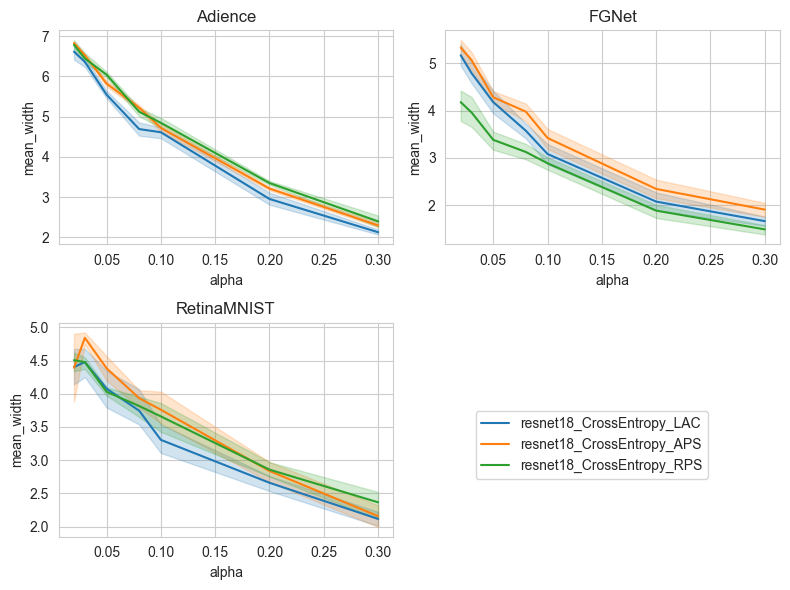

In [352]:
# (A) Nominal baseline comparisons
#
# Loss: CrossEntropy
#
# Scores: LAC vs. APS vs. RPS
#
# Model: resnet18

name = 'ce_lac_aps_rps'

df_adience_ce_lac_aps_rps = df_cond_ce_lac_aps_rps(df_adience_std).copy()
df_adience_ce_lac_aps_rps = label_method(df_adience_ce_lac_aps_rps)
df_fgnet_ce_lac_aps_rps = df_cond_ce_lac_aps_rps(df_fgnet_std).copy()
df_fgnet_ce_lac_aps_rps = label_method(df_fgnet_ce_lac_aps_rps)
df_rmnist_ce_lac_aps_rps = df_cond_ce_lac_aps_rps(df_rmnist_std).copy()
df_rmnist_ce_lac_aps_rps = label_method(df_rmnist_ce_lac_aps_rps)

dfs = {
    "Adience": df_adience_ce_lac_aps_rps,
    "FGNet": df_fgnet_ce_lac_aps_rps,
    "RetinaMNIST": df_rmnist_ce_lac_aps_rps,
}
fgnet = { "FGNet": df_fgnet_ce_lac_aps_rps }

f_fgnet_coverage, handles, labels = paper_plot_coverage(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_coverage)
with open(f'{plot_outputs}/fgnet_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_legend = paper_plot_legend(handles, labels)
pgf = fig_to_pgf_buffer(f_legend)
with open(f'{plot_outputs}/fgnet_{name}_legend.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_ssc, _, _ = paper_plot_ssc_score(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_ssc)
with open(f'{plot_outputs}/fgnet_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_mean_width, _, _ = paper_plot_mean_width(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_mean_width)
with open(f'{plot_outputs}/fgnet_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_non_cont = paper_plot_non_contiguous_perc(fgnet, 'score_alg')
pgf = fig_to_pgf_buffer(f_fgnet_non_cont)
with open(f'{plot_outputs}/fgnet_{name}_non_cont.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_all_coverage = paper_plot_coverage(dfs)
pgf = fig_to_pgf_buffer(f_all_coverage)
with open(f'{plot_outputs}/all_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_ssc = paper_plot_ssc_score(dfs)
pgf = fig_to_pgf_buffer(f_all_ssc)
with open(f'{plot_outputs}/all_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_mean_width = paper_plot_mean_width(dfs)
pgf = fig_to_pgf_buffer(f_all_mean_width)
with open(f'{plot_outputs}/all_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())


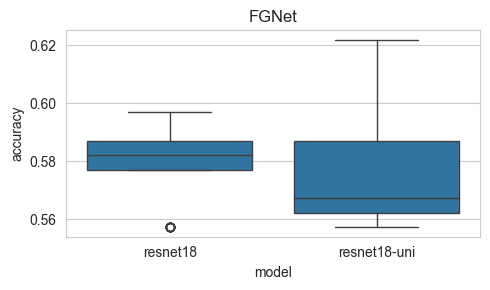

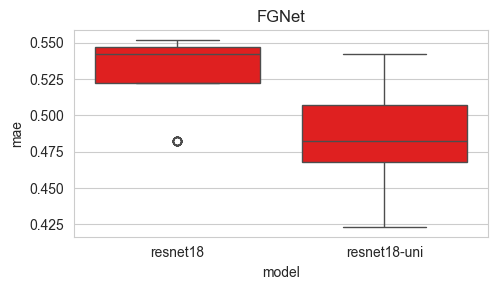

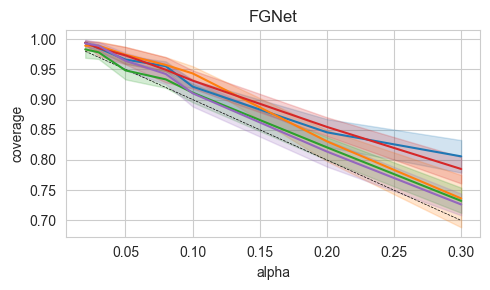

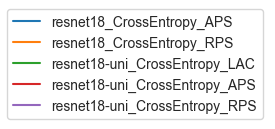

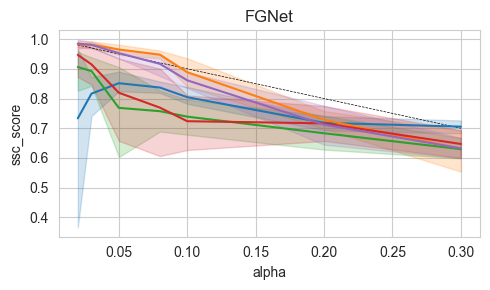

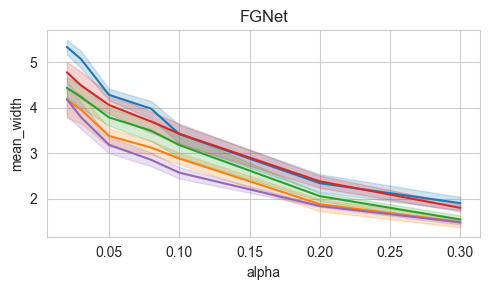

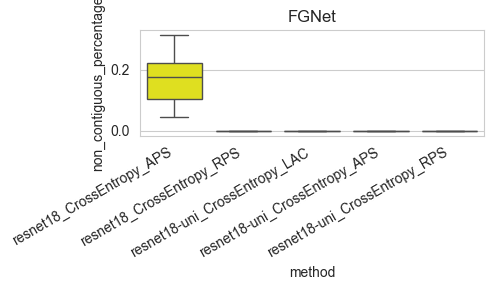

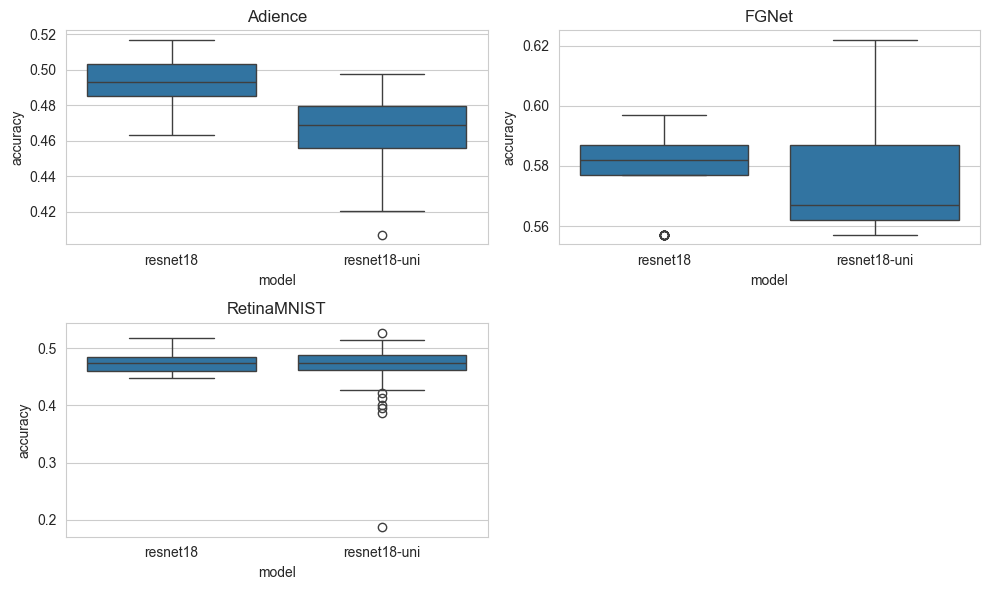

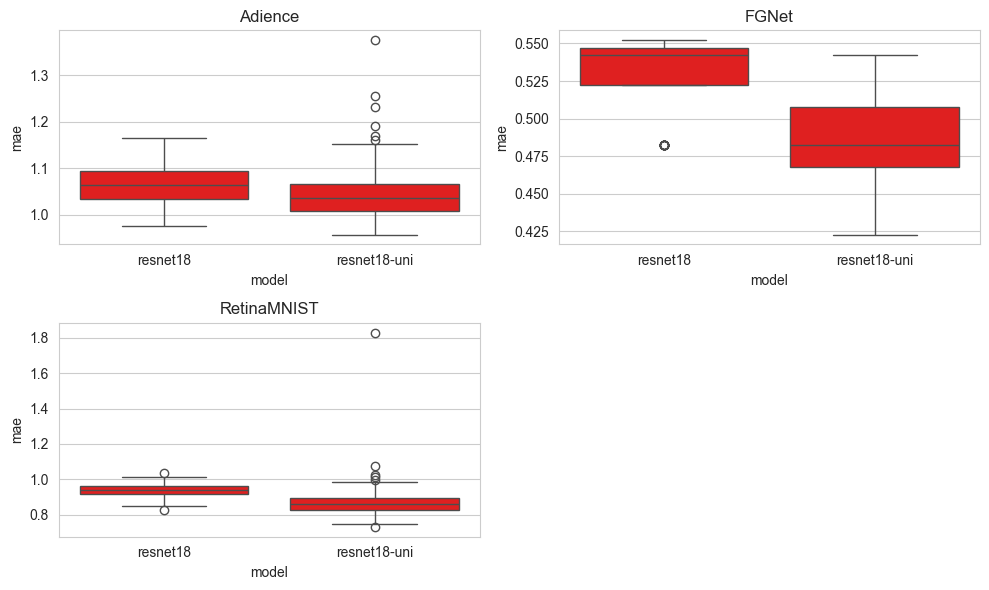

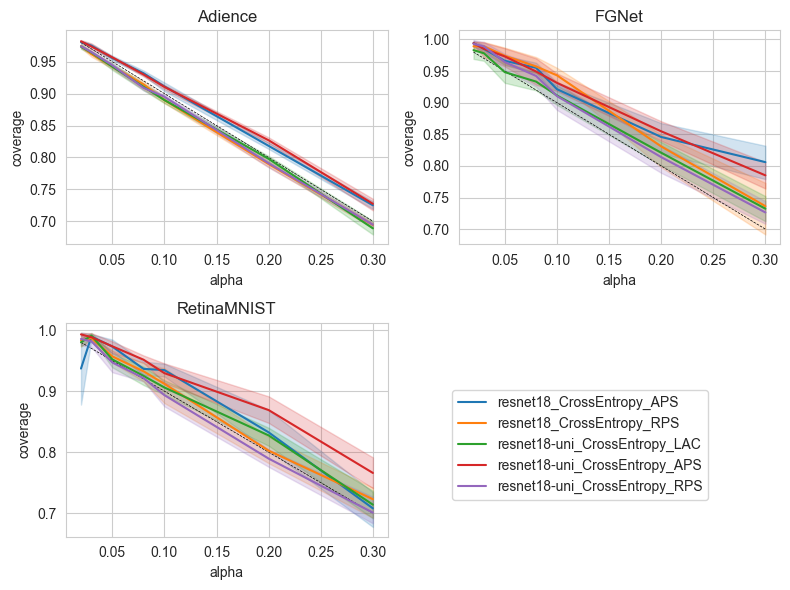

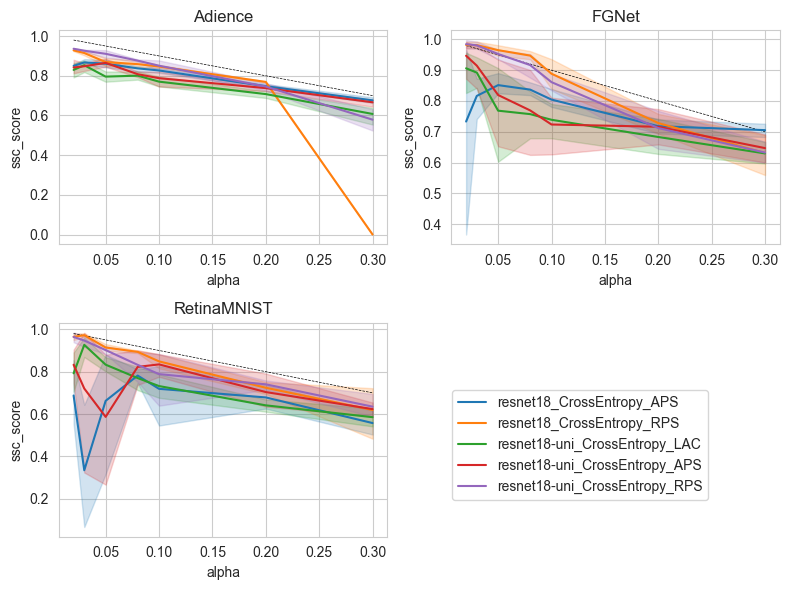

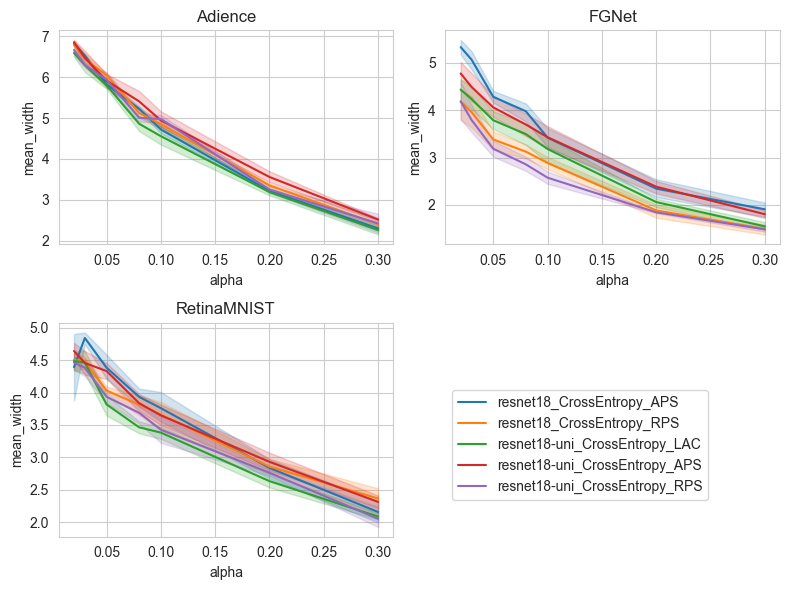

In [364]:
# (B) Ordinal model adaptations
#
# Model: resnet18 vs. resnet18-uni
#
# Loss: CrossEntropy
#
# Score: APS (resnet18) / LAC vs APS vs RPS (resnet18-uni)

name = 'std_ce_aps_uni_ce_all'

df_adience_std_ce_aps_uni_ce_all = pd.concat([df_cond_std_ce_aps_rps_or_uni_ce_all(df_adience_std), df_cond_std_ce_aps_rps_or_uni_ce_all(df_adience_uni)], ignore_index=True, sort=False)
df_adience_std_ce_aps_uni_ce_all = label_method(df_adience_std_ce_aps_uni_ce_all)
df_fgnet_std_ce_aps_uni_ce_all = pd.concat([df_cond_std_ce_aps_rps_or_uni_ce_all(df_fgnet_std), df_cond_std_ce_aps_rps_or_uni_ce_all(df_fgnet_uni)], ignore_index=True, sort=False)
df_fgnet_std_ce_aps_uni_ce_all = label_method(df_fgnet_std_ce_aps_uni_ce_all)
df_rmnist_std_ce_aps_uni_ce_all = pd.concat([df_cond_std_ce_aps_rps_or_uni_ce_all(df_rmnist_std), df_cond_std_ce_aps_rps_or_uni_ce_all(df_rmnist_uni)], ignore_index=True, sort=False)
df_rmnist_std_ce_aps_uni_ce_all = label_method(df_rmnist_std_ce_aps_uni_ce_all)

fgnet = { "FGNet": df_fgnet_std_ce_aps_uni_ce_all }
f_fgnet_acc = paper_plot_accuracy(fgnet, 'model')
pgf = fig_to_pgf_buffer(f_fgnet_acc)
with open(f'{plot_outputs}/fgnet_{name}_acc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_mae = paper_plot_mae(fgnet, 'model')
pgf = fig_to_pgf_buffer(f_fgnet_mae)
with open(f'{plot_outputs}/fgnet_{name}_mae.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_coverage, handles, labels = paper_plot_coverage(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_coverage)
with open(f'{plot_outputs}/fgnet_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_legend = paper_plot_legend(handles, labels)
pgf = fig_to_pgf_buffer(f_legend)
with open(f'{plot_outputs}/fgnet_{name}_legend.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_ssc, _, _ = paper_plot_ssc_score(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_ssc)
with open(f'{plot_outputs}/fgnet_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_mean_width, _, _ = paper_plot_mean_width(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_mean_width)
with open(f'{plot_outputs}/fgnet_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_non_cont = paper_plot_non_contiguous_perc(fgnet)
pgf = fig_to_pgf_buffer(f_fgnet_non_cont)
with open(f'{plot_outputs}/fgnet_{name}_non_cont.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

dfs = {
    "Adience": df_adience_std_ce_aps_uni_ce_all,
    "FGNet": df_fgnet_std_ce_aps_uni_ce_all,
    "RetinaMNIST": df_rmnist_std_ce_aps_uni_ce_all,
}

f_all_accuracy = paper_plot_accuracy(dfs, 'model')
pgf = fig_to_pgf_buffer(f_all_accuracy)
with open(f'{plot_outputs}/all_{name}_accuracy.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_mae = paper_plot_mae(dfs, 'model')
pgf = fig_to_pgf_buffer(f_all_mae)
with open(f'{plot_outputs}/all_{name}_mae.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_coverage = paper_plot_coverage(dfs)
pgf = fig_to_pgf_buffer(f_all_coverage)
with open(f'{plot_outputs}/all_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_ssc = paper_plot_ssc_score(dfs)
pgf = fig_to_pgf_buffer(f_all_ssc)
with open(f'{plot_outputs}/all_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_mean_width = paper_plot_mean_width(dfs)
pgf = fig_to_pgf_buffer(f_all_mean_width)
with open(f'{plot_outputs}/all_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

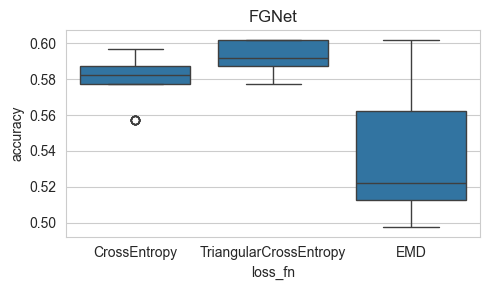

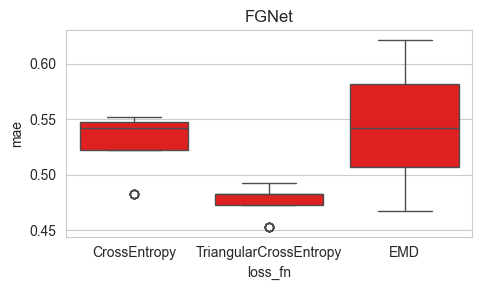

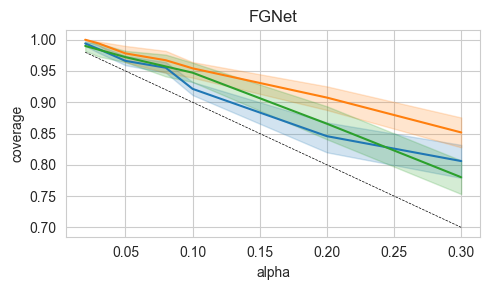

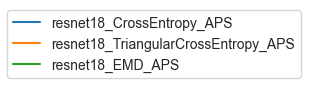

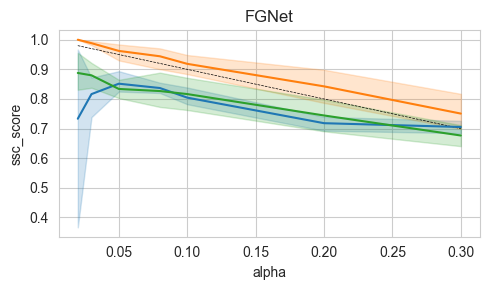

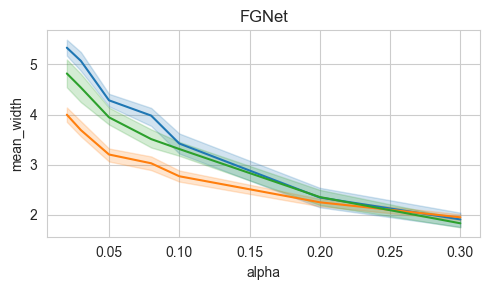

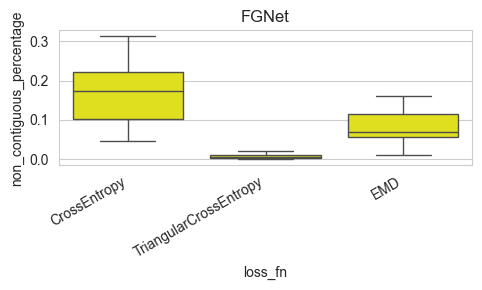

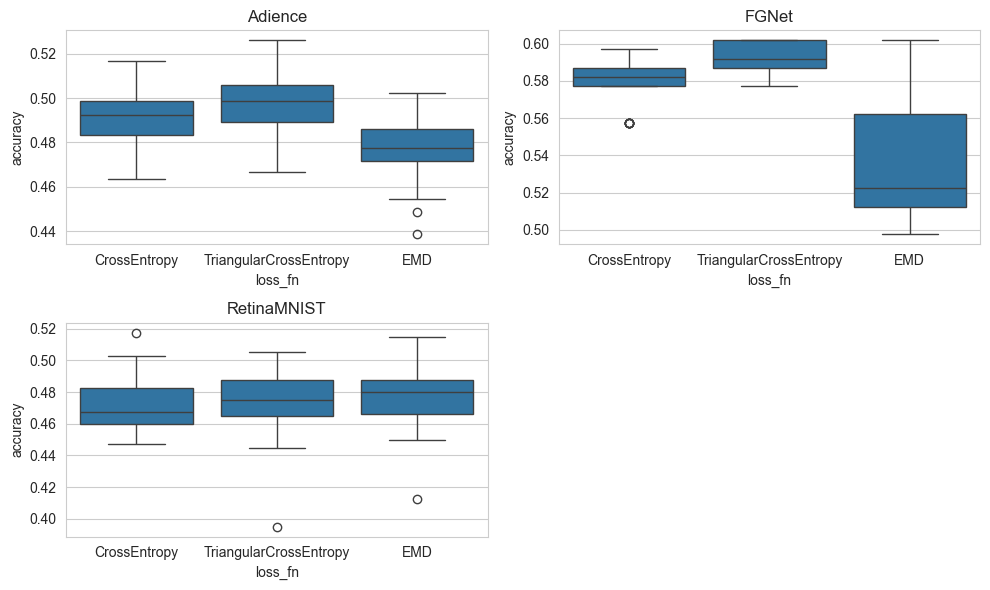

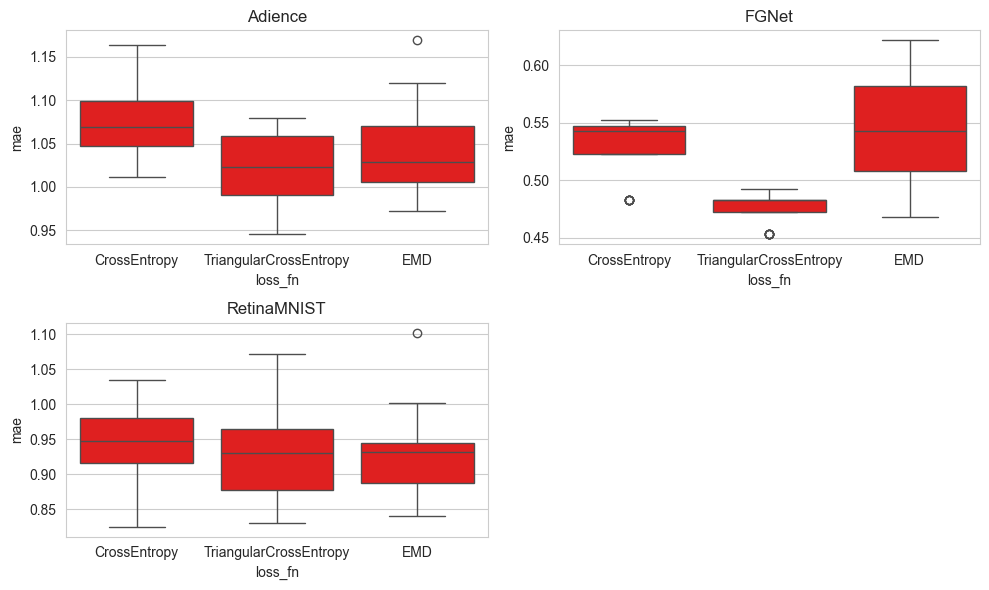

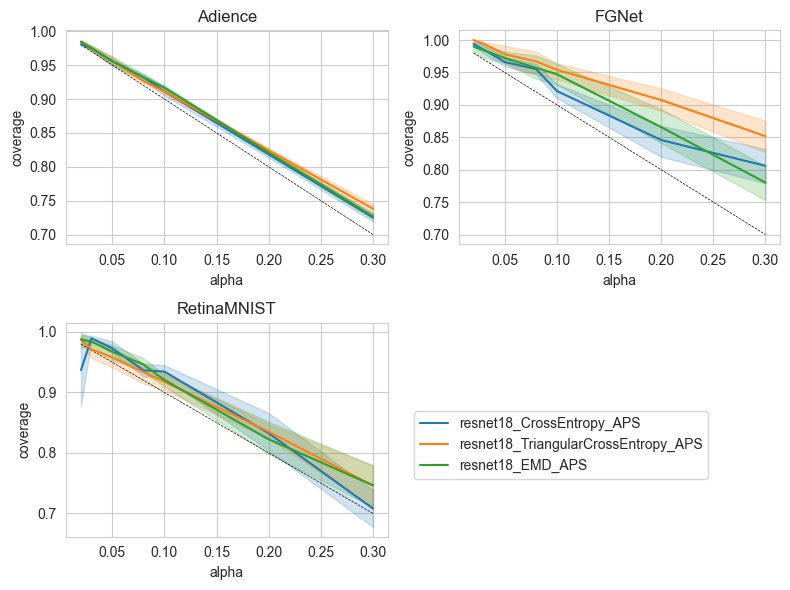

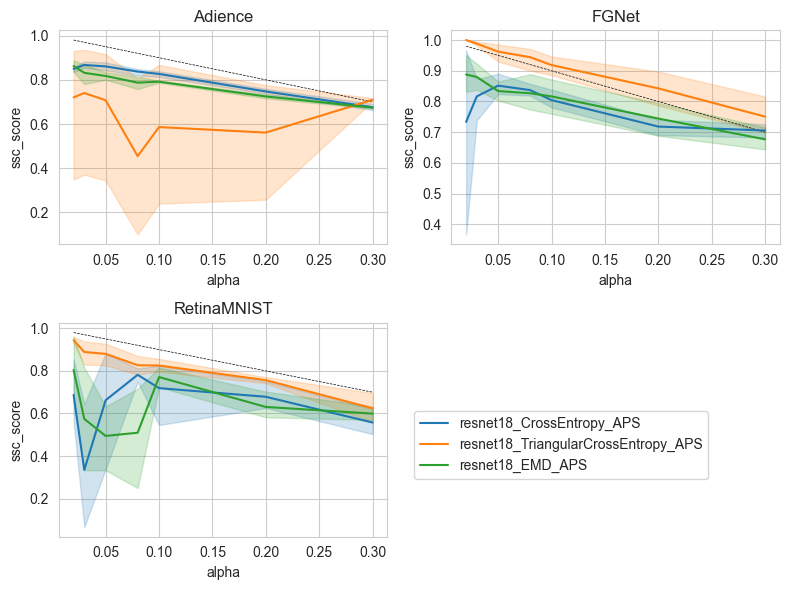

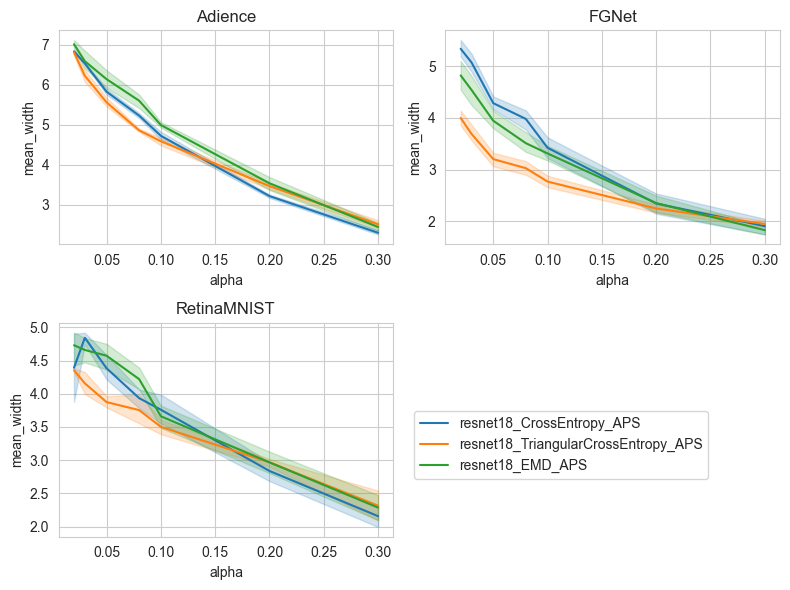

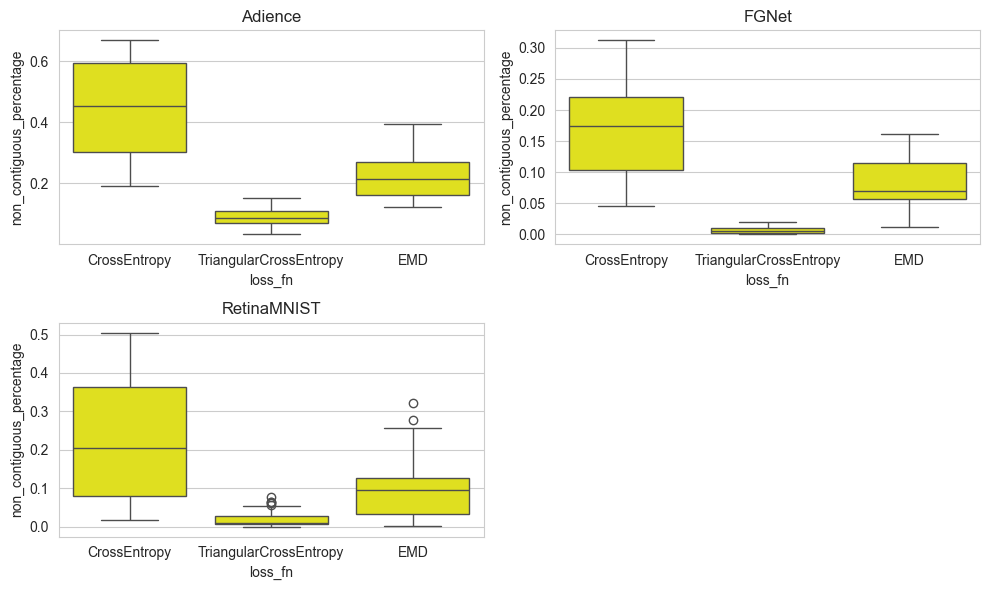

In [365]:
# (C) Ordinal loss effects
#
# Model: resnet18
#
# Loss: CE, TriangularCE, WeightedKappa, EMD
#
# Score: APS (fixed)

name = 'ce_tce_wk_emd_aps'

df_adience_ce_tce_wk_emd_aps = df_cond_ce_tce_wk_emd_aps(df_adience_std).copy()
df_adience_ce_tce_wk_emd_aps = label_method(df_adience_ce_tce_wk_emd_aps)
df_fgnet_ce_tce_wk_emd_aps = df_cond_ce_tce_wk_emd_aps(df_fgnet_std).copy()
df_fgnet_ce_tce_wk_emd_aps = label_method(df_fgnet_ce_tce_wk_emd_aps)
df_rmnist_ce_tce_wk_emd_aps = df_cond_ce_tce_wk_emd_aps(df_rmnist_std).copy()
df_rmnist_ce_tce_wk_emd_aps = label_method(df_rmnist_ce_tce_wk_emd_aps)

dfs = {
    "Adience": df_adience_ce_tce_wk_emd_aps,
    "FGNet": df_fgnet_ce_tce_wk_emd_aps,
    "RetinaMNIST": df_rmnist_ce_tce_wk_emd_aps,
}

fgnet = { "FGNet": df_fgnet_ce_tce_wk_emd_aps }
f_fgnet_acc = paper_plot_accuracy(fgnet, 'loss_fn')
pgf = fig_to_pgf_buffer(f_fgnet_acc)
with open(f'{plot_outputs}/fgnet_{name}_acc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_mae = paper_plot_mae(fgnet, 'loss_fn')
pgf = fig_to_pgf_buffer(f_fgnet_mae)
with open(f'{plot_outputs}/fgnet_{name}_mae.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_coverage, handles, labels = paper_plot_coverage(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_coverage)
with open(f'{plot_outputs}/fgnet_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_legend = paper_plot_legend(handles, labels)
pgf = fig_to_pgf_buffer(f_legend)
with open(f'{plot_outputs}/fgnet_{name}_legend.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_ssc, _, _ = paper_plot_ssc_score(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_ssc)
with open(f'{plot_outputs}/fgnet_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_mean_width, _, _ = paper_plot_mean_width(fgnet, legend_seperate=True)
pgf = fig_to_pgf_buffer(f_fgnet_mean_width)
with open(f'{plot_outputs}/fgnet_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_fgnet_non_cont = paper_plot_non_contiguous_perc(fgnet, 'loss_fn')
pgf = fig_to_pgf_buffer(f_fgnet_non_cont)
with open(f'{plot_outputs}/fgnet_{name}_non_cont.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_all_accuracy = paper_plot_accuracy(dfs, 'loss_fn')
pgf = fig_to_pgf_buffer(f_all_accuracy)
with open(f'{plot_outputs}/all_{name}_accuracy.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_mae = paper_plot_mae(dfs, 'loss_fn')
pgf = fig_to_pgf_buffer(f_all_mae)
with open(f'{plot_outputs}/all_{name}_mae.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_coverage = paper_plot_coverage(dfs)
pgf = fig_to_pgf_buffer(f_all_coverage)
with open(f'{plot_outputs}/all_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_ssc = paper_plot_ssc_score(dfs)
pgf = fig_to_pgf_buffer(f_all_ssc)
with open(f'{plot_outputs}/all_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_mean_width = paper_plot_mean_width(dfs)
pgf = fig_to_pgf_buffer(f_all_mean_width)
with open(f'{plot_outputs}/all_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_all_non_cont = paper_plot_non_contiguous_perc(dfs, 'loss_fn')
pgf = fig_to_pgf_buffer(f_all_non_cont)
with open(f'{plot_outputs}/all_{name}_non_cont.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

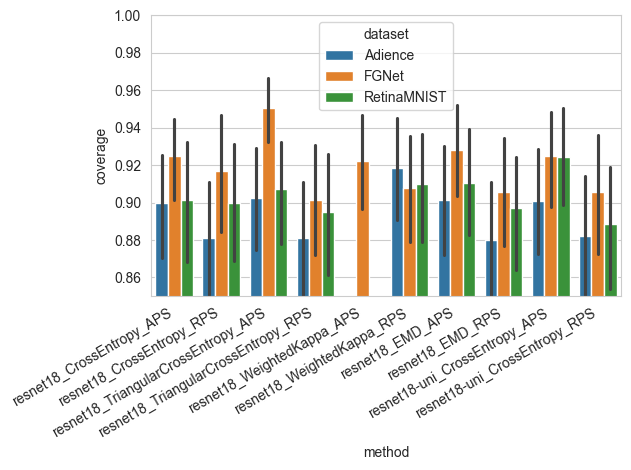

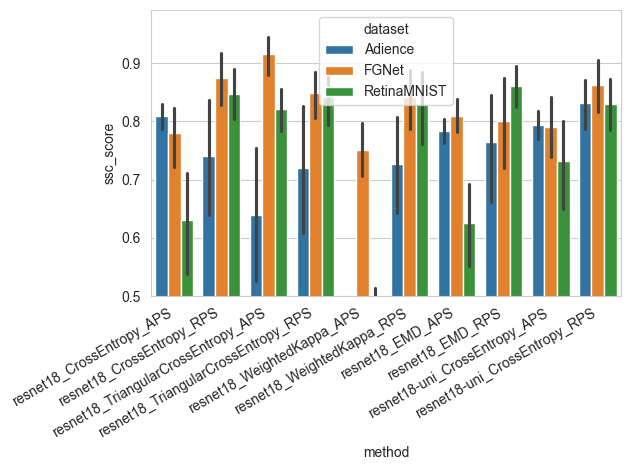

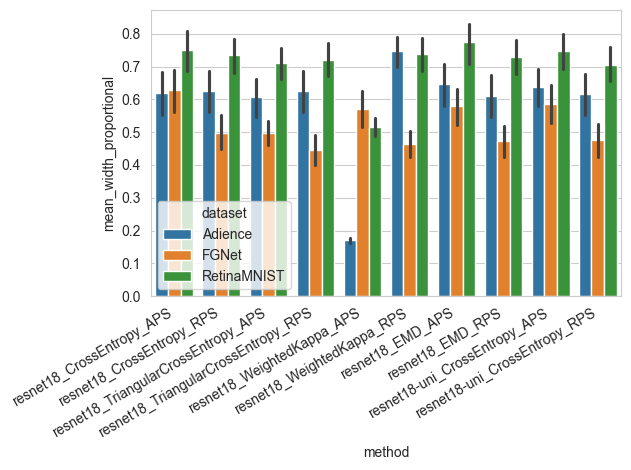

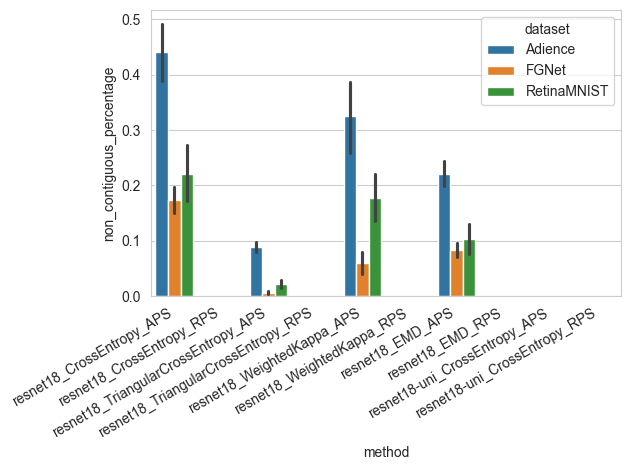

In [340]:
# (D) Dataset best methods comparison
#
# Model: resnet18, resnet18-uni
#
# Loss: CE, TriangularCE (resnet18)
#
# Score: APS, RPS

name = 'ce_or_tcestd_aps_rps'

df_adience_ce_or_tcestd_aps_rps = pd.concat([df_cond_ce_or_tcestd_aps_rps(df_adience_std), df_cond_ce_or_tcestd_aps_rps(df_adience_uni)], ignore_index=True, sort=False)
df_adience_ce_or_tcestd_aps_rps = label_method(df_adience_ce_or_tcestd_aps_rps)
df_adience_ce_or_tcestd_aps_rps = label_dataset(df_adience_ce_or_tcestd_aps_rps, 'Adience')
df_fgnet_ce_or_tcestd_aps_rps = pd.concat([df_cond_ce_or_tcestd_aps_rps(df_fgnet_std), df_cond_ce_or_tcestd_aps_rps(df_fgnet_uni)], ignore_index=True, sort=False)
df_fgnet_ce_or_tcestd_aps_rps = label_method(df_fgnet_ce_or_tcestd_aps_rps)
df_fgnet_ce_or_tcestd_aps_rps = label_dataset(df_fgnet_ce_or_tcestd_aps_rps, 'FGNet')
df_rmnist_ce_or_tcestd_aps_rps = pd.concat([df_cond_ce_or_tcestd_aps_rps(df_rmnist_std), df_cond_ce_or_tcestd_aps_rps(df_rmnist_uni)], ignore_index=True, sort=False)
df_rmnist_ce_or_tcestd_aps_rps = label_method(df_rmnist_ce_or_tcestd_aps_rps)
df_rmnist_ce_or_tcestd_aps_rps = label_dataset(df_rmnist_ce_or_tcestd_aps_rps, 'RetinaMNIST')

dfs = pd.concat([df_adience_ce_or_tcestd_aps_rps, df_fgnet_ce_or_tcestd_aps_rps, df_rmnist_ce_or_tcestd_aps_rps], ignore_index=True, sort=False)

f_coverage = paper_plot_overall_coverages(dfs, ylower=0.85, yupper=1)
pgf = fig_to_pgf_buffer(f_coverage)
with open(f'{plot_outputs}/overall_{name}_coverage.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_ssc = paper_plot_overall_ssc_score(dfs, ylower=0.5)
pgf = fig_to_pgf_buffer(f_ssc)
with open(f'{plot_outputs}/overall_{name}_ssc.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
f_mean_width = paper_plot_overall_mean_width(dfs)
pgf = fig_to_pgf_buffer(f_mean_width)
with open(f'{plot_outputs}/overall_{name}_mean_width.pgf', 'wb') as f:
    f.write(pgf.getbuffer())

f_non_cont = paper_plot_overall_non_contiguous_perc(dfs)
pgf = fig_to_pgf_buffer(f_non_cont)
with open(f'{plot_outputs}/overall_{name}_non_cont.pgf', 'wb') as f:
    f.write(pgf.getbuffer())
# f_legend = paper_plot_legend(handles, labels)
# pgf = fig_to_pgf_buffer(f_legend)
# with open(f'{plot_outputs}/fgnet_{name}_legend.pgf', 'wb') as f:
#     f.write(pgf.getbuffer())
#
# f_fgnet_ssc, _, _ = paper_plot_ssc_score(fgnet, legend_seperate=True)
# pgf = fig_to_pgf_buffer(f_fgnet_ssc)
# with open(f'{plot_outputs}/fgnet_{name}_ssc.pgf', 'wb') as f:
#     f.write(pgf.getbuffer())
#
# f_fgnet_mean_width, _, _ = paper_plot_mean_width(fgnet, legend_seperate=True)
# pgf = fig_to_pgf_buffer(f_fgnet_mean_width)
# with open(f'{plot_outputs}/fgnet_{name}_mean_width.pgf', 'wb') as f:
#     f.write(pgf.getbuffer())

In [366]:
df_adience_all = pd.concat([df_adience_std, df_adience_uni], ignore_index=True, sort=False)
df_fgnet_all = pd.concat([df_fgnet_std, df_fgnet_uni], ignore_index=True, sort=False)
df_rmnist_all = pd.concat([df_rmnist_std, df_rmnist_uni], ignore_index=True, sort=False)

minimize_metrics = ['mae', 'mean_width', 'mean_range', 'mean_gaps', 'pred_set_mae', 'non_cont']

def highlight_best(df, minimize_metrics):
    df_fmt = df.copy().round(5).astype(str)
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    for col in numeric_cols:
        if col[1] == 'std':
            continue
        values = pd.to_numeric(df[col], errors='coerce')
        if col[0] in minimize_metrics:
            best = values.min()
        else:
            best = values.max()

        # Bold the matching value(s)
        df_fmt[col] = df_fmt[col].where(values != best, '\\textbf{' + df_fmt[col] + '}')
    return df_fmt

def prepare_df_as_table(df):
    df = (df
        .groupby(['model', 'loss_fn', 'score_alg'])
        .agg({
            'coverage': ['mean', 'std'],
            'mean_width': ['mean', 'std'],
            'mean_range': ['mean', 'std'],
            'mean_gaps': ['mean', 'std'],
            # 'pred_set_mae': ['mean', 'std'],
            'accuracy': ['mean', 'std'],
            'mae': ['mean', 'std'],
            'qwk': ['mean', 'std'],
            'non_contiguous_percentage': ['mean', 'std'],
            'ssc_score': ['mean', 'std']
        })
        .rename(columns={
            'coverage': 'Coverage',
            'mean_width': 'CMWS',
            'mean_range': 'RMWS',
            'mean_gaps': 'Mean Gaps',
            'accuracy': 'Acc',
            'mae': 'MAE',
            'qwk': 'QWK',
            'non_contiguous_percentage': 'CV%',
            'ssc_score': 'SSCS',
        })
    )
    return highlight_best(df, minimize_metrics)

_LATEX_SPECIALS = {
    "\\": r"\textbackslash{}",
    "&": r"\&",
    "%": r"\%",
    "$": r"\$",
    "#": r"\#",
    "_": r"\_",
    "{": r"\{",
    "}": r"\}",
    "~": r"\textasciitilde{}",
    "^": r"\textasciicircum{}",
}
def latex_escape(s: str) -> str:
    s = str(s)
    for k, v in _LATEX_SPECIALS.items():
        s = s.replace(k, v)
    return s


with open(f'{table_outputs}/df_adience.tex', 'w') as f:
    df_adience_table = prepare_df_as_table(df_adience_all[(df_adience_all['alpha'] == 0.1) & (df_adience_all['loss_fn'] != 'WeightedKappa')])
    escaped_header = [latex_escape(c) for c in df_adience_table.columns]
    f.write(df_adience_table.to_latex(
        escape=False,
        # header=escaped_header,
    ))

with open(f'{table_outputs}/df_fgnet.tex', 'w') as f:
    df_fgnet_table = prepare_df_as_table(df_fgnet_all[(df_fgnet_all['alpha'] == 0.1) & (df_fgnet_all['loss_fn'] != 'WeightedKappa')])
    escaped_header = [latex_escape(c) for c in df_fgnet_table.columns]
    f.write(df_fgnet_table.to_latex(
        escape=False,
        # header=escaped_header,
    ))

with open(f'{table_outputs}/df_rmnist.tex', 'w') as f:
    df_rmnist_table = prepare_df_as_table(df_rmnist_all[(df_rmnist_all['alpha'] == 0.1) & (df_rmnist_all['loss_fn'] != 'WeightedKappa')])
    escaped_header = [latex_escape(c) for c in df_rmnist_table.columns]
    f.write(df_rmnist_table.to_latex(
        escape=False,
        # header=escaped_header,
    ))